# **DATA COLLECTION**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ApfAw49bR1O4jmAPmfx_apyCgn_GWFkJcWmM0LRlwx3c',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'emergingmethodsforearlydetectiono-donotdelete-pr-j6ljmb0vpulxpp'
object_key = 'DATASET.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [3]:
# VIDEO
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ApfAw49bR1O4jmAPmfx_apyCgn_GWFkJcWmM0LRlwx3c',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'emergingmethodsforearlydetectiono-donotdelete-pr-j6ljmb0vpulxpp'
object_key = 'pexels-arnav-kainthola-7543653.mp4'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [4]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
filePaths = unzip.namelist()
for path in filePaths:
    unzip.extract(path)

In [ ]:
# from io import BytesIO
# import zipfile
# unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
# filePaths = unzip.namelist()
# for path in filePaths:
#     unzip.extract(path)

In [5]:
ls

Dataset/


In [6]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/home/wsuser/work/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/home/wsuser/work/Dataset/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
test_dataset.class_indices

{'Fire': 0, 'NoFire': 1}

# **MODEL BUILDING AND FITTING**

In [8]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

**COMPILE THE MODEL ✈**

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**FIT THE MODEL ⚡**

In [10]:
r = model.fit(train_dataset,
         epochs = 20,
         validation_data = test_dataset)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.5574 - val_accuracy: 0.7000
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.6125 - accuracy: 0.5500 - val_loss: 1.0732 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 1.0828 - accuracy: 0.5000 - val_loss: 0.6001 - val_accuracy: 0.6500
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 0.6075 - accuracy: 0.6500 - val_loss: 0.5941 - val_accuracy: 0.6500
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.6100 - accuracy: 0.5500 - val_loss: 0.5713 - val_accuracy: 0.6500
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.5968 - accuracy: 0.6000 - val_loss: 0.4883 - val_accuracy: 0.9000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.5258 - accuracy: 0.7000 - val_loss: 0.3992 - val_accuracy: 0.9500
Epoch 8/20
1/1 [=========================

**SAVING THE MODEL**

In [13]:
cd work

/home/wsuser/work


In [14]:
pwd

'/home/wsuser/work'

In [15]:
model.save("model.h5")

In [16]:
ls

Dataset/  model.h5


**LOADING THE MODEL**

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [18]:
model = load_model("model.h5")

**LOSS VS ITERATION GRAPH ⤴**

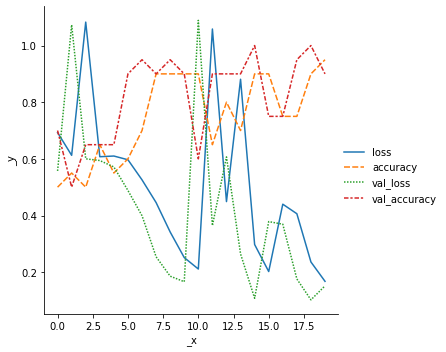

In [19]:
import seaborn as plt

plt.relplot(data=r.history, kind="line")

**ACCURACY/ITERATION ⤴**

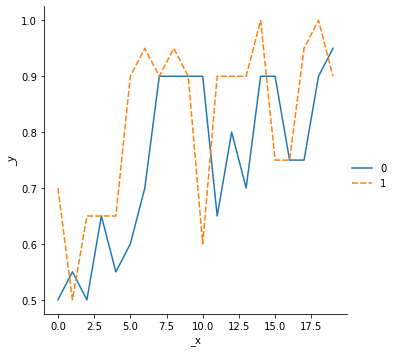

In [20]:
import seaborn as plt

plt.relplot(data=[r.history["accuracy"],r.history["val_accuracy"]], kind="line")

**FUNCTION - RETURNS IMAGE WITH LABEL 🌴**

In [21]:
import matplotlib.pyplot as plt
import random

def predictImage(filename, message = False):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 0:
      if message: sendMessage("Fire Detected")
      return plt.xlabel("Fire",fontsize=30)
    elif val == 1:
        return plt.xlabel("No Fire",fontsize=30)

In [22]:
def loadAndPredictImage(className):
  local_path = "/home/wsuser/work/Dataset/test_set/" + className + "/"
  files = []
  for filename in os.listdir(local_path):
      if filename.endswith("jpg"): 
          files.append(local_path+filename)

  ran = random.choice(files)
  predictImage(ran)

[[0.]]


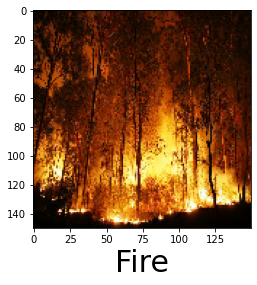

In [25]:
loadAndPredictImage("Fire")

In [24]:
cd Dataset

/home/wsuser/work/Dataset


# **IBM DEPLOYMENT**

In [28]:
ls

Dataset/  model.h5


In [29]:
!tar zvcf forest-fire-prediction-model.tgz model.h5

model.h5


In [30]:
ls

Dataset/  forest-fire-prediction-model.tgz  model.h5


In [31]:
tf.__version__

'2.7.2'

In [32]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 20.1 MB/s eta 0:00:01


In [38]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey": "SmKblYdh-p7-6vV7VmSLknsVhpAIlbKxycZfCy2ipawo"
}
client = APIClient(wml_credentials)

In [39]:
client

In [41]:
def guide_space_name(client,name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==name)['metadata']['id'])

In [42]:
space_uid = guide_space_name(client,"Newspace")
print("SPACE UID : "+space_uid)

SPACE UID : 1bafb4a6-efc9-4f95-89b6-cb1cf6e90c7d


In [43]:
client.set.default_space(space_uid)

'SUCCESS'

In [44]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [45]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [46]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [47]:
model_details = client.repository.store_model(model = "forest-fire-prediction-model.tgz",meta_props={
    client.repository.ModelMetaNames.NAME : "CNN MODEL BUILDING",
    client.repository.ModelMetaNames.TYPE : "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_space_uid
})

In [50]:
model_id = client.repository.get_model_id(model_details)

In [51]:
model_id

'9dd2df18-4ac4-4f03-bd1c-2ff29789340a'

In [52]:
client.repository.download(model_id,"forest.tar.gb")

Successfully saved model content to file: 'forest.tar.gb'


'/home/wsuser/work/forest.tar.gb'

In [53]:
ls

Dataset/  forest-fire-prediction-model.tgz  forest.tar.gb  model.h5


# **VIDEO PROCESSING**

In [ ]:
import cv2

#define video from file
video=cv2.VideoCapture("pexels-arnav-kainthola-7543653.mp4") 
#define the features 
name=['forest','with fire']

while(1):
    success, frame= video.read() 
    cv2.imwrite("image.jpg",frame)
    img=image.load_img("image.jpg",target_size=(150,150)) 
    x=image.img_to_array(img) 
    x=np.expand_dims(x,axis=0)
    pred=model.predict(x) 
    print(pred[0])
    cv2.putText(frame,"predicted class="+str(name[int(pred[0])]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,0), 1) 
    
    if pred[0]==1:
      # sendMessage("Forest Fire is detected, stay alert")
      print(message.sid)
      print('Fire Detected') 
      print('SMS sent!')
    else:
      print('No Danger') 
video.release() 
cv2.destryoAllWindows()

# **TWILIO 📲**

In [ ]:
!pip install twilio

In [ ]:
numbers = ["+919790194400","+919788372297"] # Array of numbers

In [ ]:
from twilio.rest import Client 
 
account_sid = os.getenv("twilio_sid")
auth_token = os.getenv("twilio_auth_token") 
client = Client(account_sid, auth_token) 

def sendMessage(message):
  for i in numbers:
    message = client.messages.create(messaging_service_sid=os.getenv("twilio_messagin_service_sid"), 
                                  body=message,        
                                  to=i, 
                              ) 
    print("SENT TO :",message.sid)

In [ ]:
img = "with fire (140).jpg" # PASS THE IMAGE FILE HERE
predictImage(img, True)